In [4]:
# let's import some important libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential, load_model 
from keras.layers import LSTM, Dense, Dropout 

In [5]:
#Here we are loading and reading the dataset
df = pd.read_csv('TSLA.csv')

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
1,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
3,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
4,2010-07-08,3.228000,3.504000,3.114000,3.492000,3.492000,38557000
...,...,...,...,...,...,...,...
2387,2019-12-24,83.671997,85.094002,82.538002,85.050003,85.050003,40273500
2388,2019-12-26,85.582001,86.695999,85.269997,86.188004,86.188004,53169500
2389,2019-12-27,87.000000,87.061996,85.222000,86.075996,86.075996,49728500
2390,2019-12-30,85.758003,85.800003,81.851997,82.940002,82.940002,62932000


In [7]:
#here we are reshaping the dataset using the variable open in order to get our trading days
df.shape

(2392, 7)

In [8]:
#The reshape allows you to add dimensions or change the number of elements in each dimension.
#We are using reshape(-1, 1) because we have just one dimension in our array, 
#so numby will create the same number of our rows and add one more axis: 1 to be the second dimension.
df = df['Open'].values
df = df.reshape(-1, 1)

In [6]:
df.shape

(2392, 1)

In [10]:
#let’s split the data into training and testing sets
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])
print(dataset_train.shape)
print(dataset_test.shape)

(1913, 1)
(479, 1)


In [11]:
#We will use the MinMaxScaler to scale our data between zero and one. 
#In simpler words, the scaling is converting the numerical data represented in a wide range into a smaller one.
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.0239104 ],
       [0.01851302],
       [0.01041695],
       [0.00070166],
       [0.        ]])

In [12]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.8340845 ],
       [0.87127243],
       [0.88293085],
       [0.81983541],
       [0.80958041]])

In [13]:
#Here we will use the numpy package for the array conversion
def create_dataset(df):# Her we are creating the function that will help us to create the dataset 
    x = [] #For the features (x), we will always append the last 50 prices
    y = [] # And for the label (y), we will append the next price.
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

In [15]:
#here we are creating the data  by calling the previous function of the train as well as the test datasets
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [16]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))#here we are Making the dropout fraction 0.2 drops 20% of the layers
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [17]:
#here we are again reshaping the data in order to make it 3D Array 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
#Let's compile our model
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
59/59 [==============================] - 22s 189ms/step - loss: 0.01942
Epoch 2/50
59/59 [==============================] - 11s 180ms/step - loss: 0.0035
Epoch 3/50
59/59 [==============================] - 11s 184ms/step - loss: 0.0041
Epoch 4/50
59/59 [==============================] - 11s 184ms/step - loss: 0.0036
Epoch 5/50
59/59 [==============================] - 10s 174ms/step - loss: 0.0026
Epoch 6/50
59/59 [==============================] - 10s 177ms/step - loss: 0.0028
Epoch 7/50
59/59 [==============================] - 10s 169ms/step - loss: 0.0026
Epoch 8/50
59/59 [==============================] - 10s 170ms/step - loss: 0.00231s - l
Epoch 9/50
59/59 [==============================] - 11s 183ms/step - loss: 0.0026
Epoch 10/50
59/59 [==============================] - 11s 180ms/step - loss: 0.0024
Epoch 11/50
59/59 [==============================] - 11s 189ms/step - loss: 0.0025
Epoch 12/50
59/59 [==============================] - 11s 183ms/step - loss: 0.0021
Epoch 

In [20]:
#let's load our model
model = load_model('stock_prediction.h5')

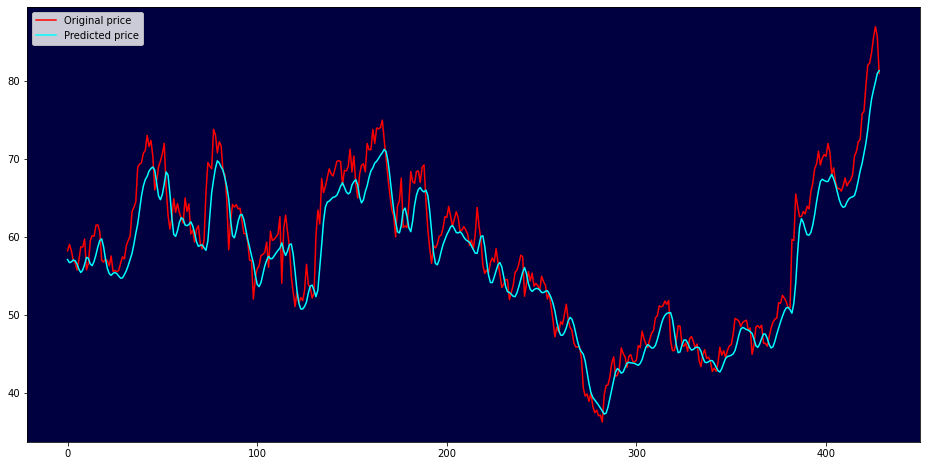

In [21]:
# Result visulization
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()